In [ ]:
import import_ipynb
import data_analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = data_analysis.dataset

In [3]:
VZ_df = pd.DataFrame(data=ds['VZ'])

In [4]:
#  Smoothening timeseries using rolling mean
VZ_df['rolling_mean'] = ds['VZ'].rolling(30).mean()

In [5]:
VZ_df.tail()

,VZ,rolling_mean
timestamp,,
2020-12-30,58.14,60.235333
2020-12-31,58.75,60.168667
2021-01-04,58.85,60.119667
2021-01-05,58.58,60.065333
2021-01-06,59.29,60.040333


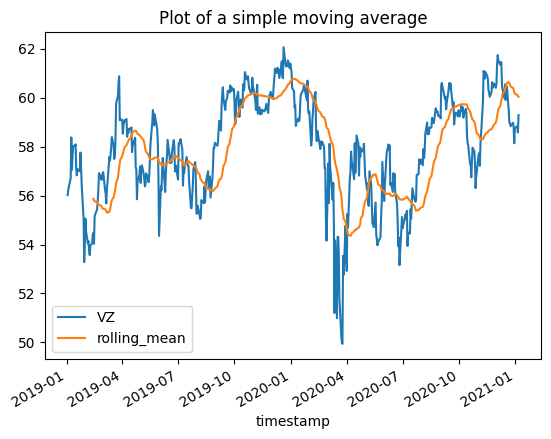

In [6]:
VZ_df.plot()
plt.title("Plot of a simple moving average");

### Plotting acf to determine best model order 

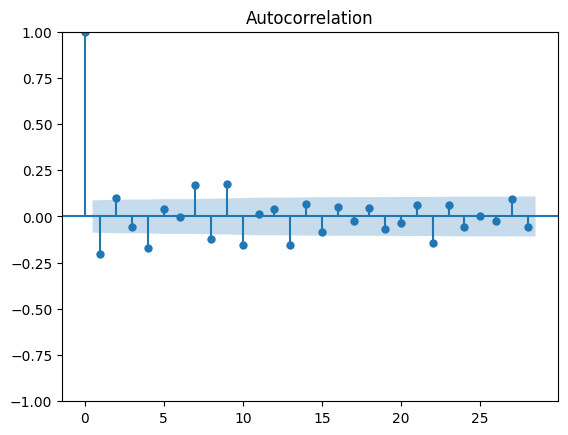

In [7]:
plot_acf(ds['VZ'].diff().dropna());

### Moving Average (MA) model

In [8]:
ARMA1_model = ARIMA(VZ_df['VZ'], order=(0, 0, 1))
results1 = ARMA1_model.fit()
# print(results.summary());
print(results1.params[1])

0.8058285723437603


In [9]:
ARMA10_model = ARIMA(VZ_df['VZ'], order=(0, 0, 10))
results10 = ARMA10_model.fit()
print(results10.params[1])

0.8856395167757323


In [10]:
ARMA22_model = ARIMA(VZ_df['VZ'], order=(0, 0, 22))
results22 = ARMA22_model.fit()
print(results22.params[1])

0.8429018420358373


### Predictions using MA model

In [11]:
start_date = VZ_df['VZ'].index[300]
end_date = VZ_df['VZ'].index[-1]

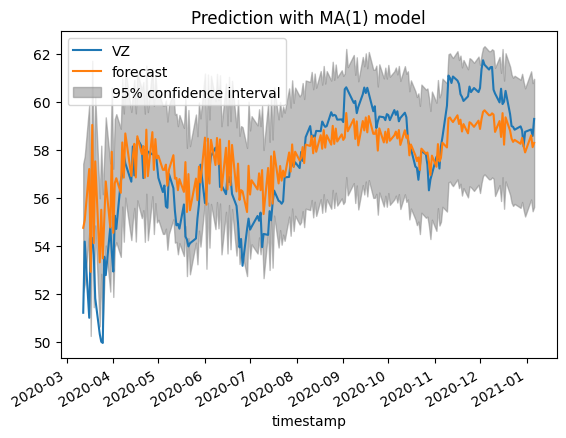

In [12]:
fig, ax = plt.subplots();
VZ_df['VZ'].loc[VZ_df['VZ'].index[300]:].plot(ax=ax)
plot_predict(results1, start=start_date, end=end_date, ax=ax)
plt.title("Prediction with MA(1) model")
plt.show()

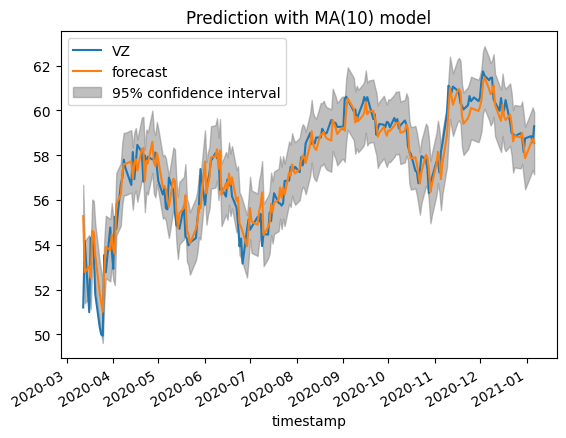

In [13]:
fig, ax = plt.subplots();
VZ_df['VZ'].loc[VZ_df['VZ'].index[300]:].plot(ax=ax)
plot_predict(results10, start=start_date, end=end_date, ax=ax)
plt.title("Prediction with MA(10) model")
plt.show()

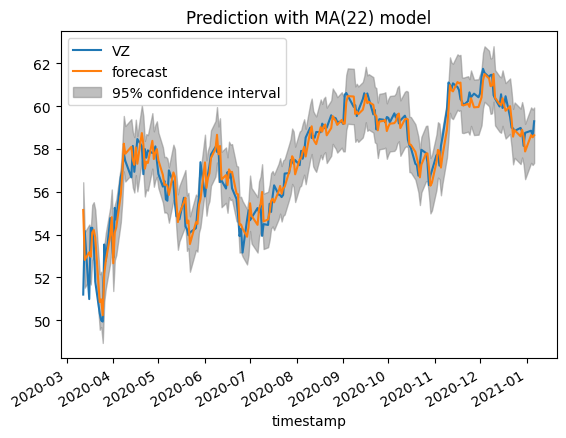

In [14]:
fig, ax = plt.subplots();
VZ_df['VZ'].loc[VZ_df['VZ'].index[300]:].plot(ax=ax)
plot_predict(results22, start=start_date, end=end_date, ax=ax)
plt.title("Prediction with MA(22) model")
plt.show()